In [19]:
import pandas as pd 
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

# Missing Data

In [7]:
np.random.seed(400)
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],
columns=['one', 'two', 'three'])

df['four']='bar'
df['five']=df['one']>0
df

,one,two,three,four,five
a,-1.130571,0.696200,-0.432293,bar,False
c,0.741020,-0.478137,1.386040,bar,True
e,0.125180,1.148860,-2.350259,bar,True
f,0.183293,-0.311386,-0.294066,bar,True
h,0.400061,1.005500,0.501643,bar,True


In [8]:
df2=df.reindex(list('abcdefgh'),axis=0)

In [9]:
df2.one.isna()

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

# Plotting

###### Plotting Columns against index

In [33]:
import matplotlib.pyplot as plt
plt.close('all')
%matplotlib inline

ts = pd.Series(np.random.randn(1000),
index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01    1.382305
2000-01-02    1.079965
2000-01-03    0.349185
2000-01-04   -0.597775
2000-01-05    0.296836
                ...   
2002-09-22    0.188327
2002-09-23    1.722655
2002-09-24    1.556948
2002-09-25   -1.521064
2002-09-26   -0.237376
Freq: D, Length: 1000, dtype: float64

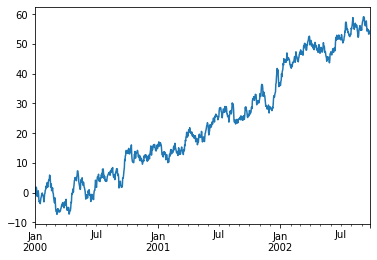

In [32]:
ts.cumsum().plot()

In [28]:
df = pd.DataFrame(np.random.randn(1000, 4),
index=ts.index, columns=list('ABCD'))
df=df.cumsum()

<Figure size 432x288 with 0 Axes>

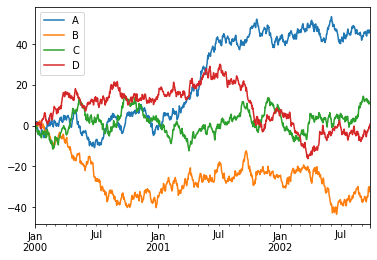

In [35]:
plt.figure()
df.plot()

###### Plotting two columns against each other

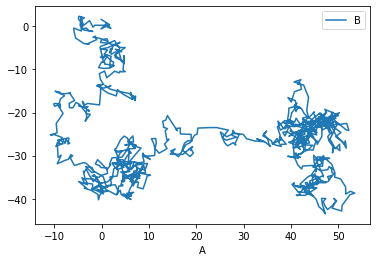

In [36]:
df.plot(x='A',y='B')

# Statistical Functions

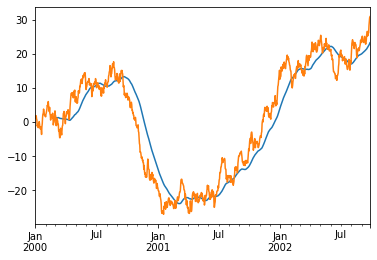

In [40]:
s = pd.Series(np.random.randn(1000),
index=pd.date_range('1/1/2000', periods=1000))

s=s.cumsum()
s.rolling(60).mean().plot()
s.plot()